<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 160.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 176.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 115.0 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [6]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [9]:
## Write your code here
duplicate_rows = df[df.duplicated(keep=False)]
num_duplicates = len(duplicate_rows)
print(f"Total duplicate rows: {num_duplicates}")

print (df.head())

Total duplicate rows: 40
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4        

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [12]:
## Write your code here
# Define the subset of columns to identify duplicates
key_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Find all rows that have duplicates based on these columns
duplicate_mask = df.duplicated(subset=key_columns, keep=False)
duplicates = df[duplicate_mask].sort_values(by=key_columns)

# Display basic info
print(f"Found {len(duplicates)} potential duplicate rows based on: {key_columns}")
print(f"This represents {len(duplicates)/len(df):.1%} of the dataset\n")

# Show the first 5 duplicate groups for inspection
print("Sample duplicate groups (first 5 groups):")
grouped_duplicates = duplicates.groupby(key_columns)
for i, (group_id, group) in enumerate(grouped_duplicates):
    if i >= 5:  # Limit to first 5 groups
        break
    print(f"\nDuplicate Group {i+1}:")
    print(group.head(2))  # Show first 2 rows of each group
    print(f"Number of duplicates in this group: {len(group)}")

# Analyze which other columns frequently match in these duplicates
print("\nAnalysis of columns with identical values in duplicates:")
identical_cols = []
varying_cols = []

for col in df.columns:
    if col not in key_columns:
        # Check if all values in each group are identical
        all_identical = grouped_duplicates[col].apply(lambda x: x.nunique() == 1).all()
        if all_identical:
            identical_cols.append(col)
        else:
            varying_cols.append(col)

print("\nColumns that are ALWAYS identical in these duplicate groups:")
print(identical_cols)

print("\nColumns that VARY within duplicate groups:")
print(varying_cols)

# Calculate the percentage of duplicates where these columns match
print("\nPercentage of duplicate groups where columns match:")
match_percentages = {}
for col in varying_cols:
    match_rate = grouped_duplicates[col].apply(lambda x: x.nunique() == 1).mean()
    if match_rate > 0.5:  # Only show columns that match in >50% of cases
        match_percentages[col] = f"{match_rate:.1%}"

print("\nColumns that frequently match (>50% of duplicate groups):")
for col, percentage in sorted(match_percentages.items(), key=lambda x: x[1], reverse=True):
    print(f"{col}: {percentage}")

## TASK 2

# Define the key columns for duplicate detection
key_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Mark all duplicates (keeping all occurrences for analysis)
duplicates_mask = df.duplicated(subset=key_columns, keep=False)
duplicates_df = df[duplicates_mask].sort_values(by=key_columns)

# Count duplicates
num_duplicates = len(duplicates_df)
print(f"Total duplicate rows based on {key_columns}: {num_duplicates}")
print(f"Percentage of dataset that are duplicates: {num_duplicates / len(df):.1%}\n")

# Display first 5 duplicate groups
print("First 5 duplicate groups (sample):")
for _, group in duplicates_df.groupby(key_columns).head(2).groupby(key_columns):
    print("\n--- Duplicate Group ---")
    print(group.head(2))  # Show first 2 rows of each group
    print(f"Group size: {len(group)} rows")

Found 65290 potential duplicate rows based on: ['MainBranch', 'Employment', 'RemoteWork']
This represents 99.7% of the dataset

Sample duplicate groups (first 5 groups):

Duplicate Group 1:
    ResponseId                      MainBranch              Age  \
12          13  I am a developer by profession  35-44 years old   
14          15  I am a developer by profession  25-34 years old   

             Employment                            RemoteWork   Check  \
12  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
14  Employed, full-time  Hybrid (some remote, some in-person)  Apples   

                                     CodingActivities  \
12  Hobby;Contribute to open-source projects;Profe...   
14  Hobby;Professional development or self-paced l...   

                                            EdLevel  \
12     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
14  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                            LearnC

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


/tmp/ipykernel_822/383634305.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


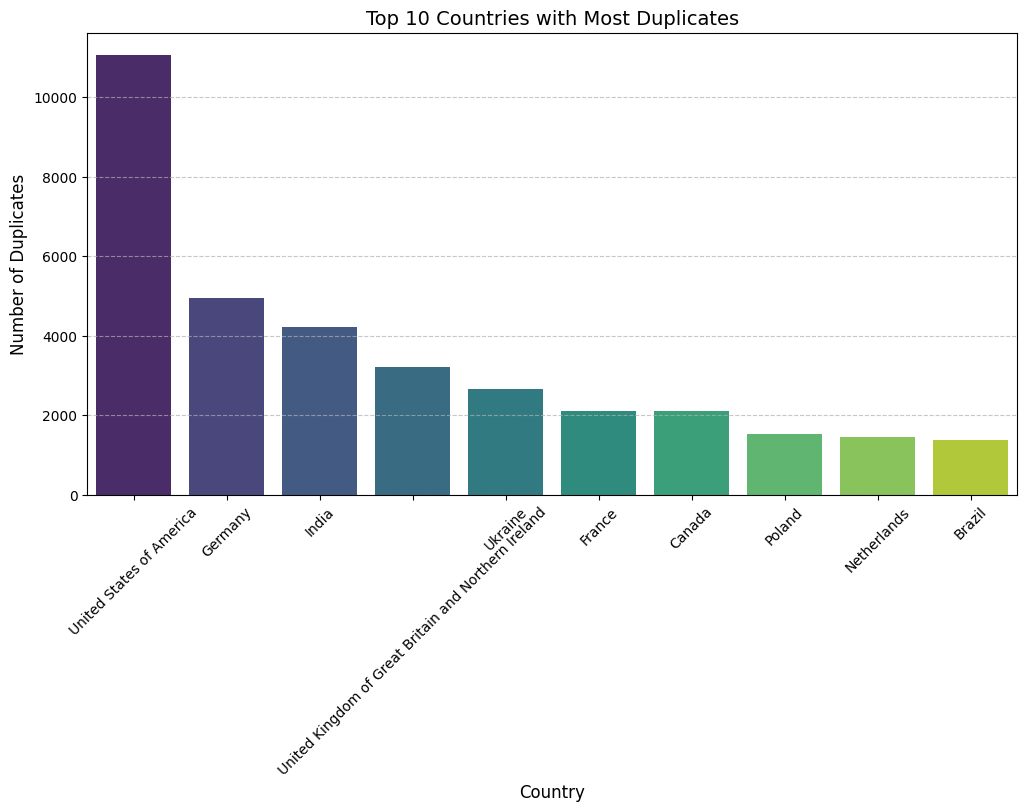

In [14]:
## Write your code here
!pip install seaborn

##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define key columns for duplicate detection
key_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Mark all duplicates (keeping all occurrences)
duplicates_mask = df.duplicated(subset=key_columns, keep=False)
duplicates_df = df[duplicates_mask]

## TASK 2
plt.figure(figsize=(12, 6))
top_countries = duplicates_df['Country'].value_counts().head(10)  # Top 10 countries

# Bar plot
sns.barplot(
    x=top_countries.index,
    y=top_countries.values,
    palette="viridis"
)
plt.title("Top 10 Countries with Most Duplicates", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Duplicates", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [16]:
## Write your code here
# Define columns that determine uniqueness
uniqueness_cols = ['Respondent', 'Age', 'Country', 'Employment', 'YearsCode', 'DevType']

print(f"Dataset shape before: {df.shape}")
duplicates = df.duplicated(subset=uniqueness_cols, keep=False)
print(f"Potential duplicates based on uniqueness cols: {duplicates.sum()}")%%!

df_clean = df.drop_duplicates(subset=uniqueness_cols, keep='first')
print(f"Dataset shape after: {df_clean.shape}")

# Compare before/after
print("\nCountry distribution (top 5):")
print(df['Country'].value_counts().head())
print(df_clean['Country'].value_counts().head())

print("\nEmployment distribution:")
print(df['Employment'].value_counts(normalize=True))
print(df_clean['Employment'].value_counts(normalize=True))

SyntaxError: invalid syntax (2445914097.py, line 7)

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
